In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
print('Complete')

Complete


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


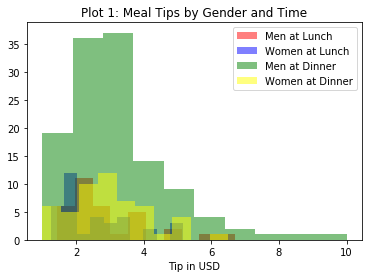

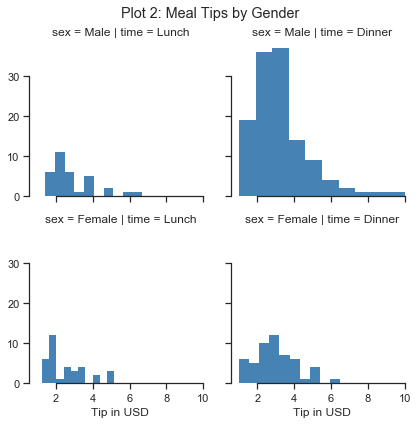

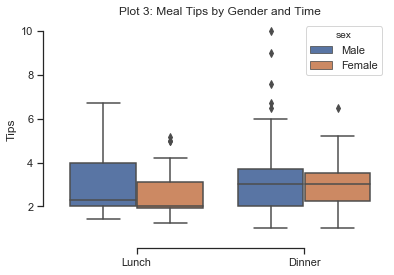

In [2]:
#Load Example dataset
tips=sns.load_dataset('tips')
print(tips.head(n=4))

#Create variables for sex and mealtime to graph
menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'), 'tip']
womenlunchtip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Lunch'), 'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'), 'tip']
womendinnertip = tips.loc[(tips['sex']=='Female')&(tips['time']=='Dinner'), 'tip']

#Create overlapping histograms
plt.hist(menlunchtip, color='red', alpha=.5, label='Men at Lunch')
plt.hist(womenlunchtip, color='blue', alpha=.5, label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5, label='Men at Dinner')
plt.hist(womendinnertip, color='yellow', alpha=.5, label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

#Showing the information in a seaborn facet grid
sns.set(style='ticks') #Preset aesthetic

#Tell seaborn about data structure
g = sns.FacetGrid(tips, row='sex', col='time')
#Name the plot type and the variable to be plotted using the created structure
g.map(plt.hist, 'tip', color='steelblue', lw=0)
#Create space for titles
plt.subplots_adjust(top=.9)
#Title informative axis name
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender')
#Remove excess lines around plot
sns.despine(trim=True)
plt.show()

#Compare using boxplots
ax = sns.boxplot(x='time', y='tip', hue='sex', data=tips)
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

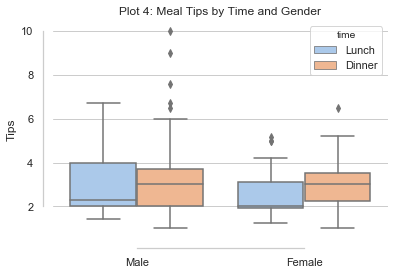

In [3]:
#Comparing groups with different emphasis

sns.set(style='whitegrid')
ax=sns.boxplot(x='sex', y='tip', hue='time', data=tips, palette='pastel')
plt.title('Plot 4: Meal Tips by Time and Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

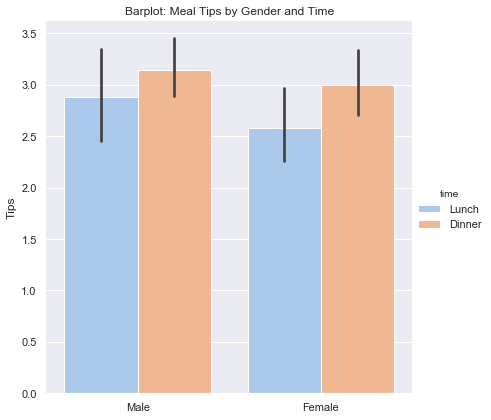

In [4]:
#Set new aesthetic
sns.set(style='darkgrid')

g = sns.catplot(x='sex', y='tip', hue='time', data=tips,
               height=6, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set_ylabels('Tips')
g.set_xlabels('')
plt.title('Barplot: Meal Tips by Gender and Time')
plt.show()

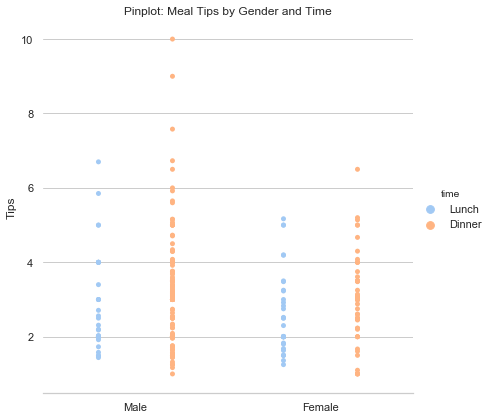

In [5]:
sns.set(style='whitegrid')

g = sns.catplot(x='sex', y='tip', hue='time', data=tips,
               height=6, kind='strip', palette='pastel', ci=95, dodge=True, jitter=False)
g.despine(left=True)
g.set_ylabels('Tips')
g.set_xlabels('')
plt.title('Pinplot: Meal Tips by Gender and Time')
plt.show()

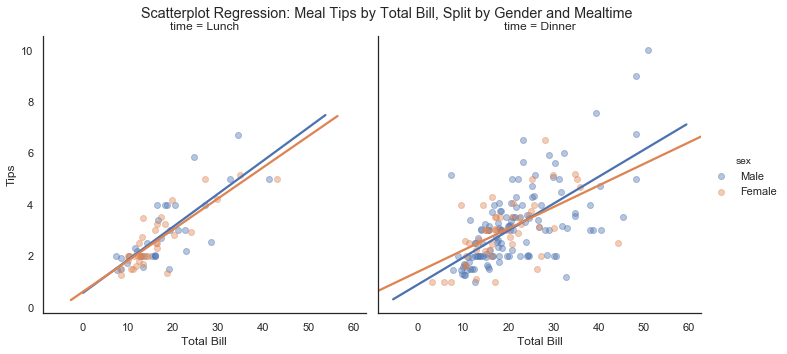

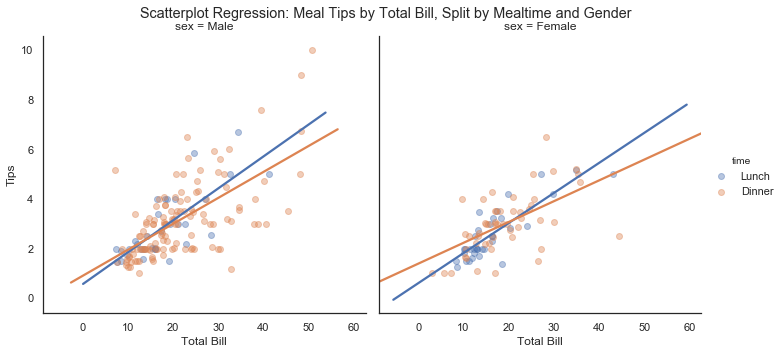

In [6]:
sns.set(style='white')
g=sns.lmplot(y='tip', x='total_bill', hue='sex', data=tips,
            col='time', fit_reg=True, ci=False, scatter_kws={'alpha':0.4})
g.set_ylabels('Tips')
g.set_xlabels('Total Bill')
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, Split by Gender and Mealtime')
plt.subplots_adjust(top=.9)
plt.show()

g=sns.lmplot(y='tip', x='total_bill', hue='time', data=tips,
            col='sex', fit_reg=True, ci=False, scatter_kws={'alpha':0.4})
g.set_ylabels('Tips')
g.set_xlabels('Total Bill')
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, Split by Mealtime and Gender')
plt.subplots_adjust(top=.9)
plt.show()